# CM50268 :: Final project (group work)

**Total Marks 25 (25% of overall unit grade).** 

*Submission deadline: 8pm, May 10, 2022. Please submit this file along with your individual report in Moodle*

## Submission & Marking

This group exercise is assessed, and the marks will contribute to your final grade. For this exercise there are a number of places where you are expected to enter your own code. Please see the BML Final Project Specification document for details. 

Every place you have to add code is described in the text and specifically indicated by the comment:

`#### **** YOUR CODE HERE **** ####`


**Please submit your completed workbook using Moodle before 8pm on May 10, 2022 along with your individual report**. The workbook you submit must be this `.ipynb` file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (Save and Checkpoint in the File menu, the icon of a floppy disk, or Ctrl-S); the version you submit should have all code blocks showing the results (if any) of execution below them.

**You should take care to avoid any suggestion of plagiarism in your submission.** There is helpful information on how to avoid plagiarism on the University website: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

# Project setup

This coursework involves the evaluation of Bayesian modelling methods on a real multivariate regression task. Please check the pdf file for the details of the project.

- <font color=Red> Please try to use fixed random seeds to make your results reproducible </font>

- <font color=Red> Please do NOT change the name of the fixed variables, as Task 2 - Task 5 of this coding exercises are auto-marked </font>

The marks for Task 1 and Task 6 will be awarded based only on the content of the report.

In [1261]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error as mse
import hmc_Lab as hmc


# Task 1 : Exploratory analysis (Section 4.1 in the specification doc)

Undertake an initial exploratory analysis of the training data and summarise. Code in Task 1 will NOT by auto-marked. Results of Task 1 will be assessed along with your individual report, i.e., 4 marks in total. 

 - <font color=Red> Please perserve the variables `X_train` and  `y_train` representing the normalised data in numpy array, as required for the following exercises  </font>

 - `X_train` is an np.array with shape (384, 9). The 1st column is a constant (bias) $x_0$ and the 2nd to the 9th columns are data variables $x_1,x_2,\dots,x_8$

 - `y_train` is also an np.array with shape (384,), representing the target variable $y$ 

In [997]:
#### **** YOUR CODE HERE **** ####  

#### **** You can add extra cells to illustrate your results **** ####  

# Load dataset
train = pd.read_csv('ee-train.csv')
test = pd.read_csv('ee-test.csv')

pre_X_train = train.iloc[:, 0:9]
pre_X_test = test.iloc[:, 0:9]

y_train = train.iloc[:, 9:10]
y_test = test.iloc[:, 9:10]

y_train = np.array(y_train).T.ravel()
y_test = np.array(y_test).T.ravel()

train.describe()

,const,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00
mean,1.00,0.77,665.77,318.18,173.80,5.38,3.54,0.24,2.78,22.92
std,0.00,0.11,88.20,42.25,44.85,1.75,1.10,0.13,1.57,10.07
min,1.00,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.40
25%,1.00,0.69,588.00,294.00,140.88,3.50,3.00,0.10,1.00,14.06
50%,1.00,0.76,661.50,318.50,147.00,7.00,4.00,0.25,3.00,23.61
75%,1.00,0.86,735.00,343.00,220.50,7.00,5.00,0.40,4.00,32.05
max,1.00,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10


In [622]:
train

,const,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,1,0.62,808.50,367.50,220.50,3.50,3,0.10,5,12.74
1,1,0.90,563.50,318.50,122.50,7.00,3,0.10,2,29.68
2,1,0.90,563.50,318.50,122.50,7.00,3,0.40,2,36.57
3,1,0.79,637.00,343.00,147.00,7.00,2,0.25,2,38.57
4,1,0.90,563.50,318.50,122.50,7.00,4,0.40,5,34.72
...,...,...,...,...,...,...,...,...,...,...
379,1,0.62,808.50,367.50,220.50,3.50,4,0.40,1,17.14
380,1,0.64,784.00,343.00,220.50,3.50,5,0.25,2,17.11
381,1,0.62,808.50,367.50,220.50,3.50,5,0.10,3,12.73
382,1,0.71,710.50,269.50,220.50,3.50,4,0.25,3,12.10


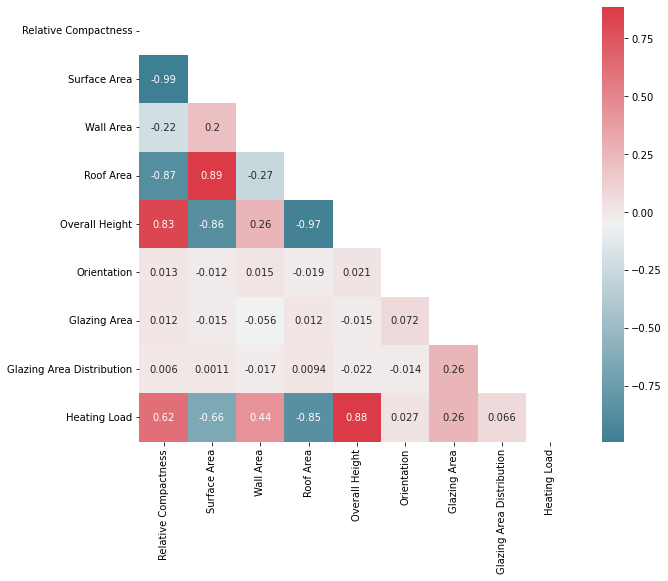

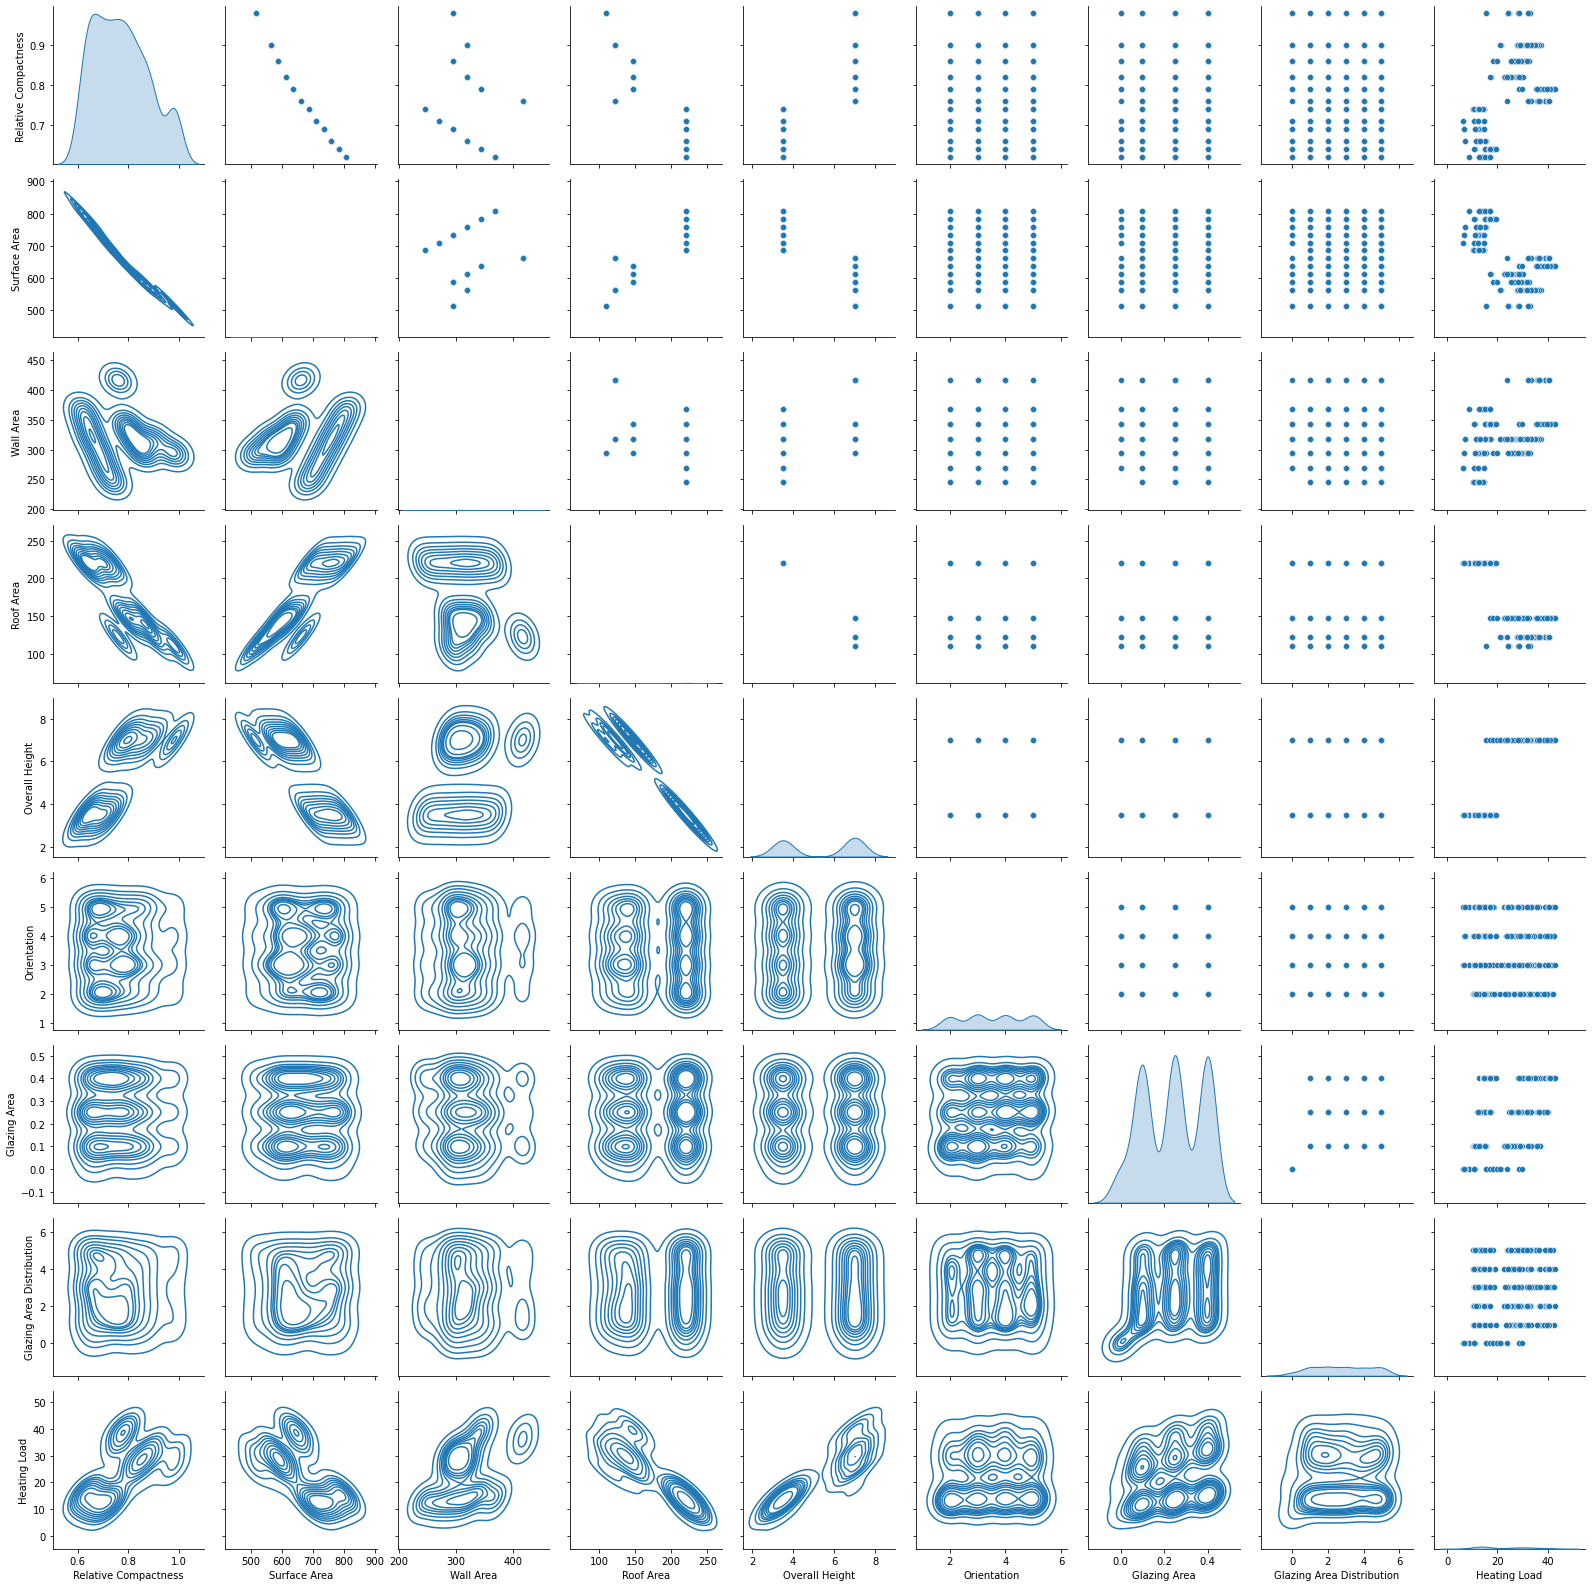

In [998]:
# Visualize the variables, excecpt x0 (the constant bias)
import matplotlib.pyplot as plt
import seaborn as sns

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Correlation between variables

# (1) Correlation Matrix
corr = train.iloc[:, 1:10].corr()
mask = np.triu(np.ones_like(corr, dtype='bool'))

fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corr, 
            annot=True, 
            cmap=cmap, 
            fmt='.2g', 
            ax=ax, 
            mask=mask, 
            square=True)

# (2) PairGrid
ax = sns.PairGrid(train.iloc[:, 1:10])
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot, colors="C0")
ax.map_diag(sns.kdeplot, lw=1, shade=True)
plt.show()


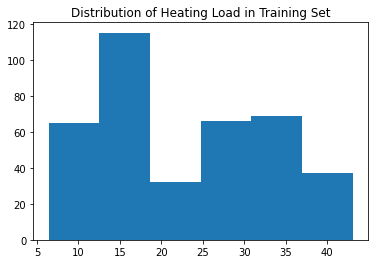

In [999]:
# Distribution of target variable (Y)
plt.hist(y_train, bins=6)
plt.title('Distribution of Heating Load in Training Set')
plt.show()

# Findings: bi-modal distribution

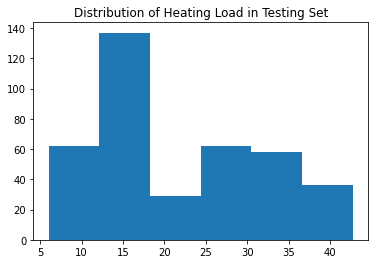

In [995]:
plt.hist(y_test, bins=6)
plt.title('Distribution of Heating Load in Testing Set')
plt.show()

In [1000]:
# Normalize the dependent variables (X)
from sklearn.preprocessing import normalize, RobustScaler, PowerTransformer

transformer = PowerTransformer(method='yeo-johnson',
                              standardize=True)

# normalise X except constant bias
norm_X_train = transformer.fit_transform(pre_X_train.iloc[:, 1:])
norm_X_test = transformer.fit_transform(pre_X_test.iloc[:, 1:])


In [1001]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("Descriptive statistics of X_train after normalisation:")
norm_X_train = pd.DataFrame(norm_X_train, columns=pre_X_train.columns[1:])
norm_X_train.describe()


Descriptive statistics of X_train after normalisation:


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
count,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00
mean,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.61,-1.72,-2.04,-1.48,-1.08,-1.43,-1.74,-1.88
25%,-0.73,-0.88,-0.52,-0.71,-1.08,-0.47,-1.03,-1.14
50%,0.01,-0.05,0.11,-0.56,0.93,0.44,0.08,0.17
75%,0.89,0.79,0.66,1.03,0.93,1.31,1.24,0.78
max,1.73,1.62,2.03,1.03,0.93,1.31,1.24,1.37


In [1002]:
print("Descriptive statistics of X_test after normalisation:")
norm_X_test = pd.DataFrame(norm_X_test, columns=pre_X_test.columns[1:])
norm_X_test.describe()

Descriptive statistics of X_test after normalisation:


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
count,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.55,-1.76,-1.89,-1.46,-0.93,-1.33,-1.77,-1.89
25%,-0.97,-0.77,-0.49,-0.88,-0.93,-1.33,-0.99,-0.53
50%,-0.01,0.05,0.09,0.91,-0.93,-0.36,0.15,0.12
75%,0.73,0.94,0.61,0.91,1.08,0.51,1.26,0.76
max,1.77,1.56,1.92,0.91,1.08,1.31,1.26,1.39


In [1003]:
norm_X_test

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,1.77,-1.76,-0.49,-1.46,1.08,-0.36,-1.77,-1.89
1,1.77,-1.76,-0.49,-1.46,1.08,0.51,-1.77,-1.89
2,1.31,-1.28,0.09,-1.24,1.08,0.51,-1.77,-1.89
3,1.31,-1.28,0.09,-1.24,1.08,1.31,-1.77,-1.89
4,1.04,-1.03,-0.49,-0.76,1.08,0.51,-1.77,-1.89
...,...,...,...,...,...,...,...,...
379,-1.25,1.25,0.61,0.91,-0.93,0.51,1.26,1.39
380,-1.25,1.25,0.61,0.91,-0.93,1.31,1.26,1.39
381,-1.55,1.56,1.09,0.91,-0.93,-1.33,1.26,1.39
382,-1.55,1.56,1.09,0.91,-0.93,0.51,1.26,1.39


In [1174]:
X_train = np.concatenate((pre_X_train.iloc[:, 0:1], norm_X_train), axis = 1)
X_test = np.concatenate((pre_X_test.iloc[:, 0:1], norm_X_test), axis = 1)

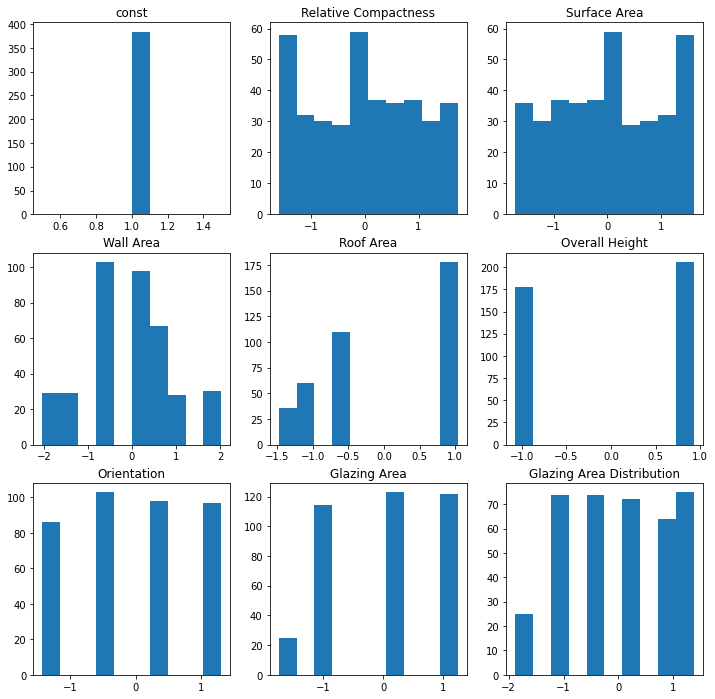

In [1586]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12),)

for m in range(9):
    col = m % 3 
    row = int(m/3)
#     col = (m - row) % 3
#     print('row: ', row)
#     print('col: ', col)
    ax[row][col].hist(X_train[:, m])
    ax[row][col].title.set_text(pre_X_train.columns[m])

plt.show()

In [1005]:
# Check whether fixed variables are correctly defined ..
try:
    if not isinstance(X_train,np.ndarray):
        print('X_train should be an array')        
    if X_train.shape != (384,9):
        print('X_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(y_train,np.ndarray):
        print('y_train should be an array')        
    if y_train.shape != (384,):
        print('y_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    

In [1175]:
# Baseline linear regression using matrices

XtX = np.dot(X_train.T, X_train)
# print(XtX)
XtX_inv = np.linalg.inv(XtX)
XtX_inv_Xt = np.dot(XtX_inv, X_train.T)
lr_w_pred = np.dot(XtX_inv_Xt, y_train)
# print(w_pred)

lr_y_train_pred = np.dot(X_train, lr_w_pred)
lr_y_test_pred = np.dot(X_test, lr_w_pred)

lr_train_rmse = mse(y_train, lr_y_train_pred, squared=False)
lr_test_rmse = mse(y_test, lr_y_test_pred, squared=False)
lr_train_mse = mse(y_train, lr_y_train_pred)
lr_test_mse = mse(y_test, lr_y_test_pred)
lr_train_mae = mae(y_train, lr_y_train_pred)
lr_test_mae = mae(y_test, lr_y_test_pred)

print('Training RMSE: ', lr_train_rmse)
print('Testing RMSE: ', lr_test_rmse)
print()
print('Training MSE: ', lr_train_mse)
print('Testing MSE: ', lr_test_mse)
print()
print('Training MAE: ', lr_train_mae)
print('Testing MAE: ', lr_test_mae)


Training RMSE:  3.0095207922705267
Testing RMSE:  3.3094629706982803

Training MSE:  9.057215399108618
Testing MSE:  10.952545154423087

Training MAE:  2.197122219344043
Testing MAE:  2.47943320538274


In [1330]:
pd.DataFrame(list(zip(pre_X_train.columns, lr_w_pred)))

,0,1
0,const,22.92
1,Relative Compactness,26.02
2,Surface Area,38.78
3,Wall Area,-3.34
4,Roof Area,-9.06
5,Overall Height,12.40
6,Orientation,-0.16
7,Glazing Area,2.76
8,Glazing Area Distribution,0.24


<AxesSubplot:>

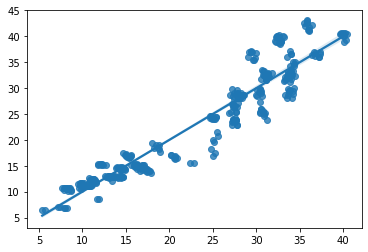

In [1176]:
# Plot Actual vs Predicted (Train)

baseline_train_pred = np.dot(X_train, w_pred)
sns.regplot(x=baseline_train_pred, y=y_train)

<AxesSubplot:>

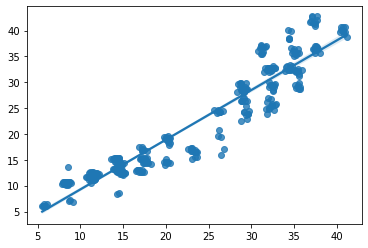

In [1177]:
# Plot Actual vs Predicted (Test)

baseline_test_pred = np.dot(X_test, w_pred)
sns.regplot(x=baseline_test_pred, y=y_test)


#  Task 2 : Type-2 maximum likelihood (Section 4.2 (a) in the specification doc)

###  **(6 marks)**

Precisions are defined as: $\alpha = 1 / \sigma_w^2$ and $ \beta = 1 / \sigma_{\epsilon}^2 $

Assume priors of $\alpha$ and $\beta$ follow flat Uniform distributions, please derive a likelihood function $(y|\alpha, \beta)$ (`compute_log_marginal`) to compute the *log-ikelihood* for the Bayesian linear regression problem using $X$ and hyperparameters $\alpha$ and $\beta$. 

In Lecture 4, slide 11 and 12 we have illustrated the equations of finding the most probable hyperparameters to maximise the likelihood with respect to the hyperparameters (slide 12).


`X`: this is an np.array equivalent to matrix $X$ in the specification doc, e.g., `X_train`, `X_test`.

`y`: this is an np.array equivalent totarget $y$ in the specification doc, e.g., `y_train`, `y_test`.


In [675]:
## Compute log-likelihood

def compute_log_marginal(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####   

    N, M = X.shape

    s2 = 1 / beta
    C = s2 * np.eye(N) + (X @ X.T) / alph

    lgp = stats.multivariate_normal.logpdf(y.T, mean=None, cov=C, allow_singular=True)
    
    return lgp


Compute log-evidence (marginal likelihood) `log_prob_y` and plot the 'contourf' of the log-posterior distribution.

- The x-axis should be the value of $log \alpha$ and y-axis the $log\beta$, `log_prob_y` represents the log-evidence. For each axis, it is recommended to use 
`np.linspace(-5,0,100)`

- It is strongly recommended that you use only natural logarithms for hyper-parameter scales. That is, you would use `numpy.exp()` and `numpy.log()` functions to convert (or to convert back) the logarithm terms.

In [676]:
#### **** YOUR CODE HERE **** ####   

log_prob_y = np.zeros((100,100))

log_alph_rng = np.linspace(-5,0,100)
alph_rng = np.exp(log_alph_rng)

log_beta_rng = np.linspace(-5,0,100)
beta_rng = np.exp(log_beta_rng)

a_idx = 0
b_idx = 0

for a in alph_rng:
    
    for b in beta_rng:
        
        log_prob_y[a_idx][b_idx] = compute_log_marginal(X_train, y_train, a, b)
        b_idx += 1
        
    a_idx += 1
    b_idx = 0

# Check whether your variables are correctly defined ..
try:
    if not isinstance(log_prob_y,np.ndarray):
        print('log_prob_y should be an array')        
    if log_prob_y.shape != (100,100):
        print('log_prob_y is arranged in a wrong shape')
except Exception as err:
    print('Error output:', err)
    

Print out the most proboble values of the parameters $\alpha$ and $\beta$ and the corresponding log-likelihood value.

In [677]:
#### **** YOUR CODE HERE **** ####
from numpy import unravel_index

max_idx = unravel_index(log_prob_y.argmax(), log_prob_y.shape)

print("Most probable log α: ", log_alph_rng[max_idx[0]])
print("Most probably log β: ", log_beta_rng[max_idx[1]])
print("Most probable α: ", alph_rng[max_idx[0]])
print("Most probably β: ", beta_rng[max_idx[1]])
print('Log probability: ', log_prob_y[max_idx])


Most probable log α:  -5.0
Most probably log β:  -2.2222222222222223
Most probable α:  0.006737946999085467
Most probably β:  0.10836802322189586
Log probability:  -1006.3589380739279


Visualisation using `plt.contourf`for the posterior distribution and indicate the most probable value (with a highlighted marker) in the graph.

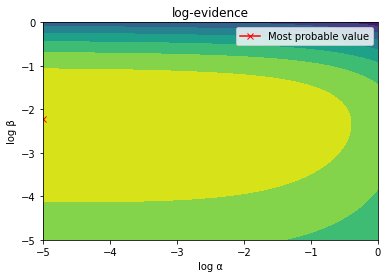

In [678]:
#### **** YOUR CODE HERE **** ####   

plt.title('log-evidence')
plt.xlabel('log α')
plt.ylabel('log β')
plt.contourf(log_alph_rng, log_beta_rng, log_prob_y.T)
plt.plot(log_alph_rng[max_idx[0]], 
         log_beta_rng[max_idx[1]], 
         marker='x',
         color='red',
         label='Most probable value')
plt.legend()
plt.show()


Write a function `compute_posterior(X, y, alph, beta)`  to compute the posterior mean $\mathbf{\mu}$ (`Mu`) and covariance $\mathbf{\Sigma}$ (`SIGMA`) for the Bayesian linear regression model, and return `Mu` and `SIGMA` for the posterior in the np.array format. 

In [679]:
def compute_posterior(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####

    M = X.shape[1]
    H = beta*(X.T @ X) + alph*np.eye(M)
    SIGMA = np.linalg.inv(H)
    Mu = beta * (SIGMA @ (X.T @ y))
    
    return Mu, SIGMA


Calculate the predicted weights and print out the corresponding RMSE for training and test sets.

In [1179]:
#### **** YOUR CODE HERE **** ####

alph = alph_rng[max_idx[0]]
beta = beta_rng[max_idx[1]]
post_Mu, post_SIGMA = compute_posterior(X_train, y_train, alph, beta)


type2ml_y_train_pred = np.dot(X_train, post_Mu)
type2ml_y_test_pred = np.dot(X_test, post_Mu)

type2ml_train_rmse = mse(y_train, type2ml_y_train_pred, squared=False)
type2ml_test_rmse = mse(y_test, type2ml_y_test_pred, squared=False)
type2ml_train_mse = mse(y_train, type2ml_y_train_pred)
type2ml_test_mse = mse(y_test, type2ml_y_test_pred)
type2ml_train_mae = mae(y_train, type2ml_y_train_pred)
type2ml_test_mae = mae(y_test, type2ml_y_test_pred)

print('Training RMSE: ', type2ml_train_rmse)
print('Testing RMSE: ', type2ml_test_rmse)
print()
print('Training MSE: ', type2ml_train_mse)
print('Testing MSE: ', type2ml_test_mse)
print()
print('Training MAE: ', type2ml_train_mae)
print('Testing MAE: ', type2ml_test_mae)


Training RMSE:  3.0241340850254432
Testing RMSE:  3.2678366413071345

Training MSE:  9.145386964212674
Testing MSE:  10.678756314269494

Training MAE:  2.1959172899655623
Testing MAE:  2.4593282221696797


In [1332]:
pd.DataFrame(list(zip(pre_X_train.columns, post_Mu)))

,0,1
0,const,22.92
1,Relative Compactness,12.65
2,Surface Area,23.76
3,Wall Area,-2.76
4,Roof Area,-8.07
5,Overall Height,11.63
6,Orientation,-0.15
7,Glazing Area,2.76
8,Glazing Area Distribution,0.23


# Task 3: Variational Inference (Section 4.2 (b) in the specification doc)

###  **(4 marks)**

Write a Variational Inference function `VI(X_train, Y_train)` and return parameter estimates. 

The returned terms should include:

`an`, `bn`, `cn`, `dn`: float

`mn_n`: np.array, shape = (9,),

`sig_n`: np.array, shape = (9,9),

where

`an` and `bn` are the hyper-parameters for $w\propto  N(w|0,\alpha)$,  $\alpha\propto Gamma(\alpha|a,b) $. 

`cn` and `dn` are the hyper-parameters for gaussian noise $N(0,\beta)$,  $\beta\propto Gamma(\beta|c,d) $.

`mn_n` and `sig_n` are the mean $\mathbf{\mu}$ and covariance $\mathbf{\Sigma}$ of the posterior distribution w.r.t. $w$ (in this task) for the Bayesian linear regression model.

The corresponding derivations should be completed in your report.



In [681]:
def VI(X_train, Y_train):
    #### **** YOUR CODE HERE **** ####
    # references: 
    # https://kaybrodersen.github.io/talks/Brodersen_2013_03_22.pdf
    # https://arxiv.org/pdf/1310.5438.pdf
    # Bishop 10.3 Variational Linear Regression

    # init starting point
    a0 = 10**-4
    b0 = 10**-4
    c0 = 10**-4
    d0 = 10**-4
    
    alph = 0.1
    beta = 0.1
    
    N, M = X_train.shape
    
    LBound = 0
    
    an = a0
    bn = b0
    cn = c0
    dn = d0
    
    mu_n = np.zeros(9)
    sig_n = np.zeros((9,9))
    
    rep = 100
    an = a0 + M/2
    cn = c0 + N/2
    
    for i in range(rep):

        sig_n = np.linalg.inv(beta * np.dot(X_train.T, X_train) + alph*np.eye(M))
        mu_n =np.dot(sig_n * beta, np.dot(X_train.T, Y_train))

        # TODO: check for convergence (Lbound), come back after GP
        
        bn = b0 +  0.5 * np.dot(mu_n.T,mu_n)
        
        alph = an/bn

        dn = d0 + 0.5 * np.dot(y_train.T, y_train) -  \
             np.dot(mu_n, np.dot(X_train.T, y_train)) + \
             0.5 * np.dot(mu_n.T, np.dot(X_train.T, np.dot(X_train, mu_n)))

        beta = cn/dn
    
    return an, bn, cn, dn, mu_n, sig_n


Print out the expectation of $\alpha$ and $\beta$ as `exp_alpha`,`exp_beta`. 


In [1331]:
try:
    an,bn,cn,dn, mu_n, sig_n = VI(X_train, y_train)
except Exception as err:
    print('Error output:', err)
    
#### Print out the expectation of alpha and beta
#### **** YOUR CODE HERE **** ####

exp_alpha = an/bn
exp_beta = cn/dn

print('log <𝛼>: ', np.log(exp_alpha))
print('log <𝛽>: ', np.log(exp_beta))
print('<𝛼>:', exp_alpha)
print('<𝛽>:', exp_beta)


log <𝛼>:  -5.16774810981194
log <𝛽>:  -2.211398633696055
<𝛼>: 0.00569738426804307
<𝛽>: 0.10954732473891272


In [682]:
# Check whether your variables are correctly defined  ..
try:
    if not isinstance(mu_n,np.ndarray):
        print('mu_n should be an array')        
    if mu_n.shape != (9,):
        print('mu_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(sig_n,np.ndarray):
        print('sig_n should be an array')        
    if sig_n.shape != (9,9):
        print('sig_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    exp_alpha
    exp_beta
except Exception as err:
    print('Error output:', err)

Calculate the RMSE for training and test sets.

In [1180]:
#### **** YOUR CODE HERE **** ####

vi_y_train_pred = np.dot(X_train, mu_n)
vi_y_test_pred = np.dot(X_test, mu_n)

vi_train_rmse = mse(y_train, vi_y_train_pred, squared=False)
vi_test_rmse = mse(y_test, vi_y_test_pred, squared=False)
vi_train_mse = mse(y_train, vi_y_train_pred)
vi_test_mse = mse(y_test, vi_y_test_pred)
vi_train_mae = mae(y_train, vi_y_train_pred)
vi_test_mae = mae(y_test, vi_y_test_pred)

print('Training RMSE: ', vi_train_rmse)
print('Testing RMSE: ', vi_test_rmse)
print()
print('Training MSE: ', vi_train_mse)
print('Testing MSE: ', vi_test_mse)
print()
print('Training MAE: ', vi_train_mae)
print('Testing MAE: ', vi_test_mae)


Training RMSE:  3.0213373023984302
Testing RMSE:  3.2711503277858944

Training MSE:  9.128479094864224
Testing MSE:  10.700424466973764

Training MAE:  2.194750721117987
Testing MAE:  2.4600027663308173


In [1333]:
#### **** YOUR CODE HERE **** ####   
pd.DataFrame(list(zip(pre_X_train.columns, mu_n)))

,0,1
0,const,22.92
1,Relative Compactness,13.98
2,Surface Area,25.28
3,Wall Area,-2.83
4,Roof Area,-8.20
5,Overall Height,11.71
6,Orientation,-0.15
7,Glazing Area,2.76
8,Glazing Area Distribution,0.23


# Task 4: Verify HMC on a standard 2D Gaussian example (Section 4.3 in the specification doc)

###  **(4 marks)**

## The "Distribution"

Complete the following functions:

- `energy_func(x)`: the energy function, return negative log pdf value in float format
- `energy_grad(x)`: the gradient function returns a numpy array containing the partial derivatives of the energy function with respect to the parameters/hyper-parameters.
- `covar`: Covariance matrix for 2-dimensional gaussian. It is an numpy array with shape (2,2), e.g,  np.array([[1.0875,1],[1,1.0875]]) 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`



In [954]:
def energy_func(x, covar):
    #### **** YOUR CODE HERE **** ####

    neglgp = -1*stats.multivariate_normal.logpdf(x=x, mean=None, cov=covar, allow_singular=True)
    
    return neglgp

def energy_grad(x, covar):
    #### **** YOUR CODE HERE **** ####
    
    # reference: https://www.phase-trans.msm.cam.ac.uk/2003/MP9/MP9-2.pdf
    V_inv = np.linalg.inv(covar)
    g = 0.5 * np.dot(x.T, V_inv + V_inv.T)
    
#     print(g)
    return g


## Visualising the Distribution
Before we run the sampler, let's visualise the distribution over an appropriate
grid of values. Please specify `covar` to plot figures, an naive example of `covar` has been shown below

In [ ]:

#### **** YOUR CODE BELOW **** ####

covar = np.array([[1.0875,1],[1,1.0875]])
# print(covar.shape)

#### **** YOUR CODE ABOVE **** ####

f = 5  # The "frequency" argument for the energy, used here to demonstrate how to use "args"
# Other plotting parameters
fsz = (10,8)
gsz = 100
lim = 3

# Setup the mesh grid

gx = np.linspace(-lim, lim, gsz)
GX, GY = np.meshgrid(gx, gx)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))

# Plot the figure
plt.figure(figsize=fsz)
P = np.asarray([np.exp(-energy_func(g, covar)) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

In [686]:
try:
    if not isinstance(covar ,np.ndarray):
        print('covar  should be an array')        
    if covar .shape != (2,2):
        print('covar  is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

In [744]:
# Initialise the state for the first time step
x0 = np.random.normal(size=2)

# Call the function from the pre-defined hmc module
hmc.gradient_check(x0, energy_func, energy_grad, covar)



[-10.50052116   9.35917605]
Calc.         Numeric       Delta         Acc.
    -10.5005      -10.5005   1.202423e-09  10
     9.35918       9.35918   1.528857e-09  10


## Hyper-parameters

Please tune optimal hyper-parameters incluidng `R`, `L`, and `eps` in the cell below. 

Calc.         Numeric       Delta         Acc.
    -10.5005      -10.5005   1.202423e-09  10
     9.35918       9.35918   1.528857e-09  10
|----------|  0% accepted [ 22 secs to go ]
|#---------| 80% accepted [ 20 secs to go ]
|##--------| 80% accepted [ 18 secs to go ]
|###-------| 80% accepted [ 16 secs to go ]
|####------| 80% accepted [ 14 secs to go ]
|#####-----| 80% accepted [ 11 secs to go ]
|######----| 81% accepted [ 9 secs to go ]
|#######---| 81% accepted [ 7 secs to go ]
|########--| 81% accepted [ 5 secs to go ]
|#########-| 81% accepted [ 2 secs to go ]
|##########| 81% accepted [ 0 secs to go ]
HMC: R=10000 / L=100 / eps=0.45 / Accept=81.3%


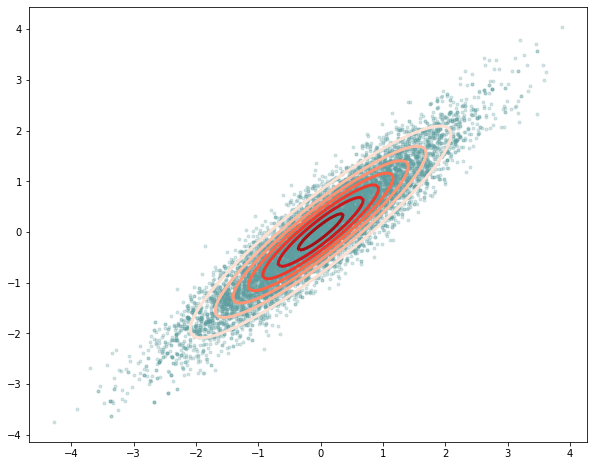

In [1024]:
np.random.seed(seed=1)  # Fix the random seed for better reproducibility

#### **** YOUR CODE BELOW **** ####

R = 10000
L = 100
eps = 0.45
burn = int(R/10) 

#### **** YOUR CODE ABOVE **** ####

# HMC sampling
S, *_ = hmc.sample(x0, energy_func, energy_grad, R, L, eps, burn=burn, checkgrad=True, args=[covar])

# Plot the figure
plt.figure(figsize=fsz)
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);



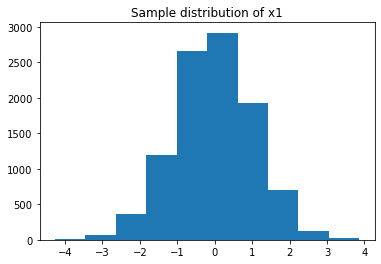

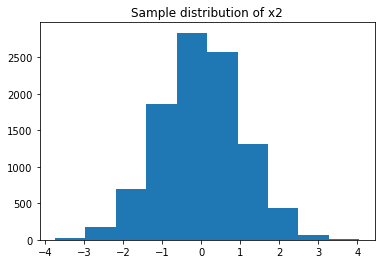

In [1026]:
#### **** YOUR CODE HERE **** ####

#### **** You can add extra figures to support the individual report **** ####

plt.hist(S[:,0])
plt.title('Sample distribution of x1')
plt.show()
plt.hist(S[:,1])
plt.title('Sample distribution of x2')
plt.show()


# Task 5: Apply HMC to the Linear Regression Model (Section 4.4 in the specification doc)

###  **(8 marks)**

Complete the functions and the HMC code for this task:

- `energy_func_lr(hps, x, y)`: where `hps` is a 2+9 dimension array, where the 1st dimension represents $\alpha$, and the 2nd represnets $\beta$. Thus, `hps[0]` should be the current $\alpha$, `hps[1]` the $\beta$ and `hps[2:]` represent the weights `w` for constant and 8 variables respectively. `x` and `y` is the x and y array of training data.

- `energy_grad_lr(hps, x, y)`: the gradient function returns an array containing the partial derivatives of the energy function. should be the same shape for hps. 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`




In [1547]:
def energy_func_lr(hps, x, y):
    a0 = 10**-4
    b0 = 10**-4
    c0 = 10**-4
    d0 = 10**-4
    
    alpha = hps[0]
    beta = hps[1]
    
#     alpha = np.log(math.e**hps[0])
#     beta = np.log(math.e**hps[1])
    
    w = hps[2:]
    N, M = x.shape
    
    WtX = np.dot(x, w)
    WtW = np.dot(w.T, w)
#     lgp = -(beta/2)*np.sum((y-WtX)**2) - (alpha/2)*WtW
    
#     lgp = 2 * np.log(beta) -(beta/2)*np.sum((y-WtX)**2) - (alpha/2)*WtW + beta **4
#     lgp = (N/2)*np.log(beta) - (beta/2)*np.sum((y-WtX)**2) - (alpha/2)*WtW + np.log(beta) - (beta **4)/2

    YtY = np.dot(y.T, y)
    XW = np.dot(x, w)
    
    lgp = (N/2) * np.log(beta) - (beta/2) * YtY + beta * np.dot(XW.T, y) - (beta/2) * np.dot(XW.T, XW) + \
          (M/2) * np.log(alpha) - (alpha/2) * WtW + (a0-1) * np.log(alpha) - b0* (alpha) + \
          (c0-1) * np.log(beta) - d0 * beta
    
    return -lgp
    

In [1549]:
def energy_grad_lr(hps, x, y):
    
    a0 = 10**-4
    b0 = 10**-4
    c0 = 10**-4
    d0 = 10**-4
    
    alpha = hps[0]
    beta = hps[1]

#     alpha = np.log(math.e**hps[0])
#     beta = np.log(math.e**hps[1])
    
    w = hps[2:]
    N, M = x.shape
#     print(w)
    
# #     print(w.shape)
    WtW = np.dot(w.T, w)
    WtX = np.dot(x, w)
    YtY = np.dot(y.T, y)
    XtY = np.dot(x.T, y)
    XtX = np.dot(x.T, x)
    XW = np.dot(x, w)
    
    # Gradient w.r.t. alpha
#     grad_al = 0.5 * WtW 
    grad_al = -(M/(2*alpha)) + 0.5*WtW - (a0-1)/alpha + b0
    
#     print('func grad al: ', grad_al)

    # Gradient w.r.t. beta
#     grad_beta = -2/beta + 0.5* np.sum((y-WtX)**2) + 2 * (beta**3)
#     grad_beta = -((N/2)*beta) + 0.5* np.sum((y-WtX)**2) -(1/beta) + 2 * (beta**3)
    grad_beta = -(N/(2*beta)) + 0.5 * YtY - np.dot(XW.T, y) + 0.5 * np.dot(XW.T, XW) -  (c0-1)/beta + d0
#     print('func grad beta: ', grad_beta)
#     print()

    # Gradient w.r.t. w
#     grad_w = -beta * np.dot(x.T, (y-WtX)) + alpha*w
    grad_w = -beta * XtY + beta * np.dot(XtX, w) + alpha * w

    grad = np.concatenate(([grad_al], [grad_beta], grad_w), axis=None)
    
    return grad


In [1588]:
from sklearn.datasets import make_spd_matrix

#### **** YOUR CODE HERE **** ####

# construct hps

hps = np.ones(11, dtype=float)

R = 10000
L = 100

# all one init
# eps = 0.00015 # L=20; accept=91.0%
eps = 0.000047 # L=100; accept=91.5%

burn = int(R/10) 

#### you can adjust the hpyer-parameters. 

S, *_ = hmc.sample(hps, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, y_train])


Calc.         Numeric       Delta         Acc.
           1       1.00001   1.489045e-05   5
      109144        109144   1.338328e-05  10
    -8416.55      -8416.55  -1.129521e-06  10
    -2566.43      -2566.43   5.283109e-06   9
     2606.38       2606.38   1.450255e-06  10
    -1363.55      -1363.55  -3.370182e-06   9
     3166.15       3166.15   7.308313e-07  10
    -3291.71      -3291.71  -3.841209e-06   9
     305.129       305.129   4.734520e-06   8
    -499.574      -499.574   2.117745e-07  10
     192.294       192.294  -9.566836e-07   9
|----------|  0% accepted [ 64 secs to go ]
|#---------| 99% accepted [ 59 secs to go ]
|##--------| 99% accepted [ 53 secs to go ]
|###-------| 99% accepted [ 46 secs to go ]
|####------| 99% accepted [ 42 secs to go ]
|#####-----| 99% accepted [ 34 secs to go ]
|######----| 99% accepted [ 29 secs to go ]
|#######---| 99% accepted [ 22 secs to go ]
|########--| 99% accepted [ 15 secs to go ]
|#########-| 99% accepted [ 7 secs to go ]
|#######

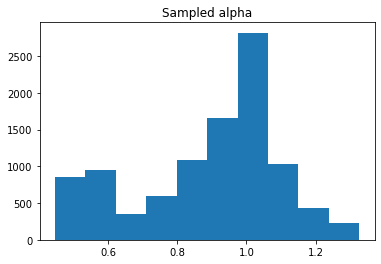

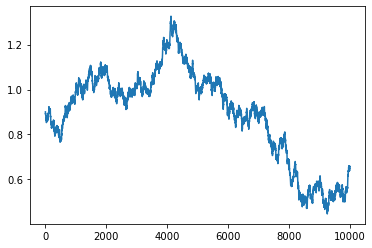

In [1589]:
plt.hist(S[:,0])
plt.title('Sampled alpha')
plt.show()

plt.plot(S[:,0])
plt.show()

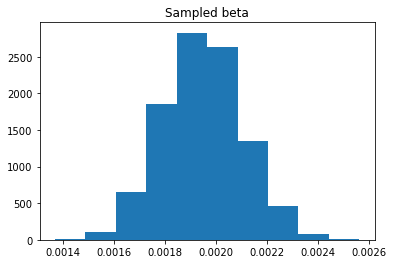

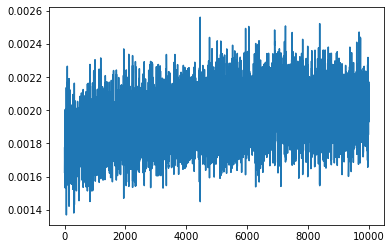

In [1590]:
plt.hist(S[:,1])
plt.title('Sampled beta')
plt.show()
plt.plot(S[:,1])
plt.show()

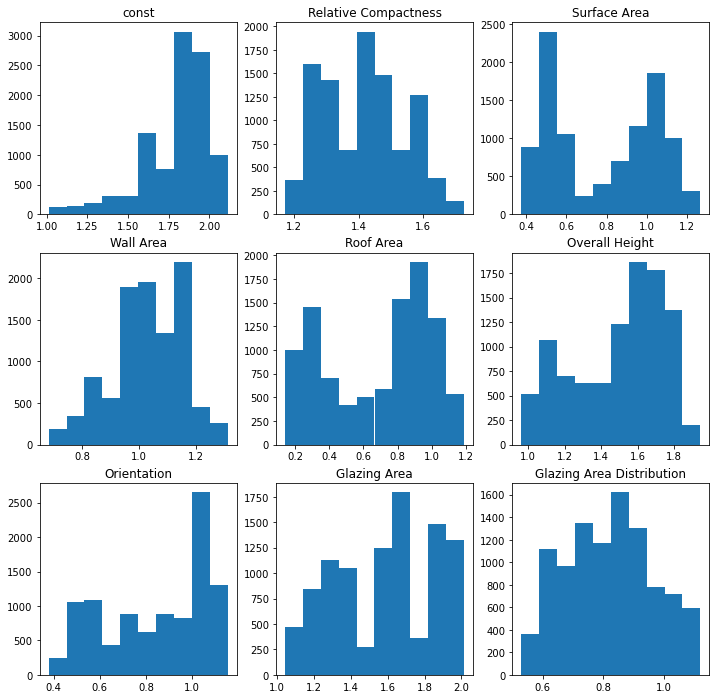

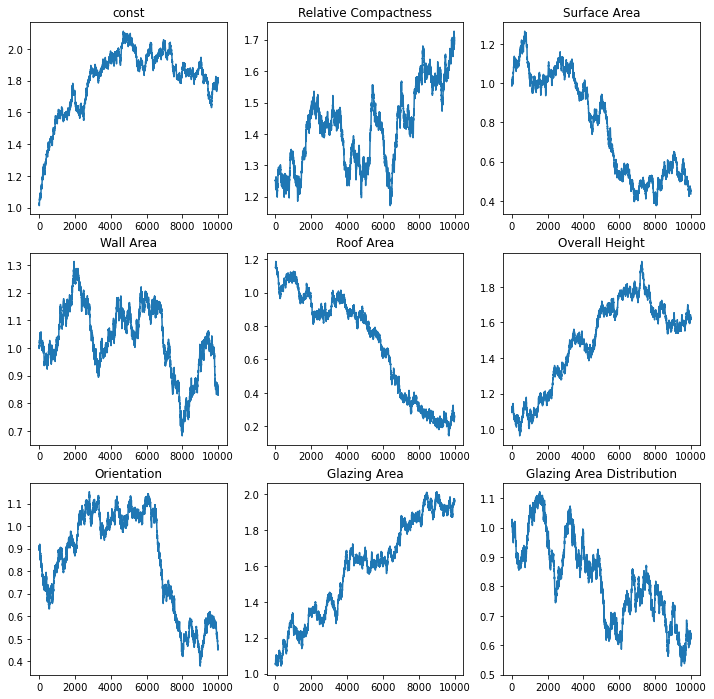

In [1591]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12),)

for m in range(9):
    col = m % 3 
    row = int(m/3)
#     col = (m - row) % 3
#     print('row: ', row)
#     print('col: ', col)
    ax[row][col].hist(S[:, 2+m])
    ax[row][col].title.set_text(pre_X_train.columns[m])

plt.show()
    
fig2, ax2 = plt.subplots(nrows=3, ncols=3, figsize=(12, 12),)
for m in range(9):
    col = m % 3 
    row = int(m/3)
#     col = (m - row) % 3
#     print('row: ', row)
#     print('col: ', col)
    ax2[row][col].plot(S[:, 2+m])
    ax2[row][col].title.set_text(pre_X_train.columns[m])

plt.show()

## Print out the RMSE and plot figures for your report

In [1596]:
#### **** YOUR CODE HERE **** ####
hmc_alpha = np.mean(S[:,0])
print('alpha: ', hmc_alpha)
print('log alpha: ', np.log(hmc_alpha))
hmc_beta = np.mean(S[:,1])
print('beta: ', hmc_beta)
print('log beta: ', np.log(hmc_beta))
w_mean_hmc = np.mean(S[:,2:], axis=0)
pd.DataFrame(list(zip(pre_X_train.columns, w_mean_hmc)))


alpha:  0.8915801047970595
log alpha:  -0.11475999176485464
beta:  0.0019484241426816315
log beta:  -6.240734365079281


,0,1
0,const,1.80
1,Relative Compactness,1.42
2,Surface Area,0.78
3,Wall Area,1.03
4,Roof Area,0.69
5,Overall Height,1.49
6,Orientation,0.85
7,Glazing Area,1.58
8,Glazing Area Distribution,0.82


In [1593]:
hmc_y_train_pred = np.dot(X_train, w_mean_hmc)
hmc_y_test_pred = np.dot(X_test, w_mean_hmc)

hmc_train_rmse = mse(y_train, hmc_y_train_pred, squared=False)
hmc_test_rmse = mse(y_test, hmc_y_test_pred, squared=False)
hmc_train_mse = mse(y_train, hmc_y_train_pred)
hmc_test_mse = mse(y_test, hmc_y_test_pred)
hmc_train_mae = mae(y_train, hmc_y_train_pred)
hmc_test_mae = mae(y_test, hmc_y_test_pred)


print('Training RMSE: ', hmc_train_rmse)
print('Testing RMSE: ', hmc_test_rmse)
print()
print('Training MSE: ', hmc_train_mse)
print('Testing MSE: ', hmc_test_mse)
print()
print('Training MAE: ', hmc_train_mae)
print('Testing MAE: ', hmc_test_mae)


Training RMSE:  22.651106408179018
Testing RMSE:  21.489820286482292

Training MSE:  513.0726215146486
Testing MSE:  461.81237594530586

Training MAE:  21.121625432792086
Testing MAE:  19.89462022445879


<AxesSubplot:>

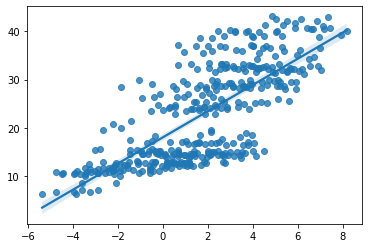

In [1594]:
hmc_train_pred = np.dot(X_train, w_mean_hmc)
sns.regplot(x=hmc_train_pred, y=y_train)


<AxesSubplot:>

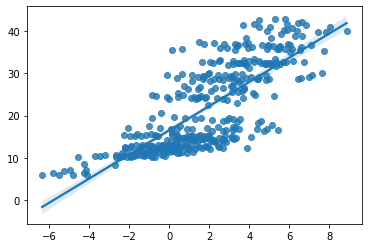

In [1595]:
hmc_test_pred = np.dot(X_test, w_mean_hmc)
sns.regplot(x=hmc_test_pred, y=y_test)


In [1605]:
hmc_y_train_pred.shape

(384,)

# Task 6: Gaussian Processes

###  **(3 marks)**

There's no restriction on the GP implementation, you could either use the sklearn package or the Tensorflow style, the latter of which may receive extra bonus mark depending on the quality of implementation.  

You only need to estimate the weights from $x0$ to $x8$ in this task, then calculate RMSE and plot supporting figures for your report. 

<font color=Red>  It is highly recommended that you impelment this part in a seperated file if your implementation contains too many extra libraries, as it may fool the auto-marker and incorrectly mark the rest of your notebook. 
<font>   
    
    
